### 获取模型

In [1]:
%matplotlib inline 
import megengine.hub
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = megengine.hub.load('megengine/models', 'shufflenet_v2_x1_0', pretrained=True)
# model = megengine.hub.load('megengine/models', 'shufflenet_v2_x0_5', pretrained=True)
# model = megengine.hub.load('megengine/models', 'shufflenet_v2_x1_5', pretrained=True)
# model = megengine.hub.load('megengine/models', 'shufflenet_v2_x2_0', pretrained=True)
model.eval()


24 17:27:13[mgb] WRN cuda unavailable: CUDA driver version is insufficient for CUDA runtime version(35) ndev=-1
24 17:27:14 load_serialized_obj_from_url: download to or using cached /home/kai/.cache/megengine/serialized/d82a45_snetv2_x1_0_69369_daf9dba0.pkl


### 加载测试图片

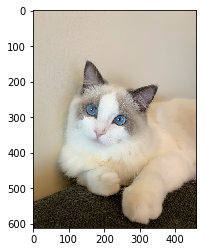

In [23]:
import urllib
url, filename = ("https://data.megengine.org.cn/images/cat.jpg", "cat.jpg")
try: 
    urllib.URLopener().retrieve(url, filename)
except: 
    urllib.request.urlretrieve(url, filename)

# Read and pre-process the image
import cv2
import numpy as np

image = cv2.imread("cat.jpg")
show_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.show()

In [27]:
import megengine.data.transform as T
import megengine.functional as F

transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.Normalize(mean=[103.530, 116.280, 123.675], std=[57.375, 57.120, 58.395]),  # BGR
    T.ToMode("CHW"),
])
processed_img = transform.apply(image)[np.newaxis, :]  # CHW -> 1CHW

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


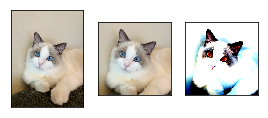

In [37]:
#dump pics, transform based on rgb
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
])
resize_img = transform.apply(show_img)
plt.subplot(1,4,1)
plt.xticks([])
plt.yticks([])
plt.imshow(show_img)
plt.subplot(1,4,2)
plt.xticks([])
plt.yticks([])
plt.imshow(resize_img)
plt.subplot(1,4, 3)
plt.xticks([])
plt.yticks([])
transform_normalize = T.Compose([
        T.Resize(256),
    T.CenterCrop(224),
    T.Normalize(mean=[103.530, 116.280, 123.675], std=[57.375, 57.120, 58.395]),  # BGR
])
normalize_img = transform_normalize.apply(image)
plt.imshow(normalize_img)
plt.show()

In [8]:
#inference
logits = model(processed_img)
probs = F.softmax(logits)
print(probs.shape)

probs_np = probs.numpy()
print(np.max(probs_np)) 
index = np.where(probs_np == np.max(probs_np))
print(index)

(1, 1000)
0.5346588
(array([0]), array([284]))


**https://github.com/MegEngine/Models/blob/master/official/assets/imagenet_class_info.json**

In [5]:
url, filename = ("https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt", "class_info.json")
try: 
    urllib.URLopener().retrieve(url, filename)
except: 
    urllib.request.urlretrieve(url, filename)
!ls |grep json


class_info.json
labels.json


In [6]:
import json
with open("labels.json", 'r', encoding="utf8") as f:
    data=json.loads(f.read())
    
data[str(index[1][0])]


    

['n02123597', 'Siamese_cat']